# 간단한 데이터 집계와 시각화


### 주요 내용

1. 평균 등 집계값 계산
2. 피벗 테이블 생성 
3. 히스토그램 등 그래프 작성

<br>

### 목표 
1. 건수, 평균 등 집계값을 계산한다.
2. 피벗테이블로 집계값을 계산할 수 있다. 
3. 히스토그램, 막대그래프 등 상황에 맞는 그래프를 작성한다. 


<br>
<hr>
<br>

# 1. 데이터 집계와 시각화

일반적으로 데이터 전처리 이후 평균, 건수 등을 계산하는 집계와 히스토그램과 같은 그래프를 그리는 시각화가 이뤄집니다. 집계와 시각화는 별도의 과정에서 더 자세히 다룰 예정이고, 여기서는 간단한 몇가지 예제를 함께 살펴보겠습니다.

### 1.1. 건수, 평균 등의 계산

먼저 관심 변수를 선택한 다음, *mean()*과 같은 메서드를 활용하여 집계값을 계산할 수 있습니다.  
변수 선택 이전에 *groupby()*를 추가하고 그룹별 집계값 계산도 가능합니다.

In [10]:
import pandas as pd
df_ins = pd.read_csv('data/insurance.csv')
df_sp  = pd.read_csv('data/StudentsPerformance.csv')
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df_ins['charges'].sum() 
df_ins['charges'].mean()
df_ins['charges'].median()
df_ins['charges'].count()

1338

In [4]:
# 그룹별 집계값 계산
df_ins.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [9]:
# 그룹별 건수 계산
df_ins.groupby('sex')['charges'].count()
df_ins['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
# DataFrame 형식으로 출력
df_ins.groupby('sex', as_index=False)['charges'].mean()

,sex,charges
0,female,12569.578844
1,male,13956.751178


In [15]:
# 복수 그룹 변수의 활용
df_ins.groupby(['sex', 'smoker'])['charges'].mean()

sex     smoker
female  no         8762.297300
        yes       30678.996276
male    no         8087.204731
        yes       33042.005975
Name: charges, dtype: float64

In [16]:
# 복수 그룹 변수의 활용(DataFrame 형식으로 출력)
df_ins.groupby(['sex', 'smoker'], as_index=False)['charges'].mean()

,sex,smoker,charges
0,female,no,8762.297300
1,female,yes,30678.996276
2,male,no,8087.204731
3,male,yes,33042.005975


In [17]:
# 복수 수치형 변수의 동일한 집계값 계산
df_ins.groupby(['sex', 'smoker'], as_index=False)[['charges', 'age']].mean()

,sex,smoker,charges,age
0,female,no,8762.297300,39.691042
1,female,yes,30678.996276,38.608696
2,male,no,8087.204731,39.061896
3,male,yes,33042.005975,38.446541


In [18]:
# 다양한 변수와 다양한 함수 활용한 집계
# agg() 활용 
agg1 = df_ins.groupby('sex', as_index=False).agg({'charges':['count', 'mean'], 'age':['min', 'max']})
agg1

sex charges               age    
            count          mean min max
0  female     662  12569.578844  18  64
1    male     676  13956.751178  18  64

<br>

#### [실습] df_sp을 활용

1. 'math score'의 평균 계산
2. 'race/ethnicity'별 'math score'의 평균 계산
3. as_index=True, as_index=False를 활용해서 1.의 결과를 Series, DataFrame 형식으로 바꿔 출력
4. 'race/ethnicity', 'lunch' 수준 조합별 'math score', 'reading score', 'writing score'의 평균 계산


In [19]:
df_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df_sp['math score'].mean()
df_sp.groupby('race/ethnicity')['math score'].mean()
df_sp.groupby('race/ethnicity', as_index=False)['math score'].mean()
df_sp.groupby(['race/ethnicity','lunch'] )[['math score', 'reading score', 'writing score']].mean()


math score  reading score  writing score
race/ethnicity lunch                                                 
group A        free/reduced   55.222222      60.555556      57.194444
               standard       65.981132      67.471698      66.396226
group B        free/reduced   57.434783      63.971014      61.521739
               standard       66.884298      69.280992      67.925620
group C        free/reduced   56.412281      63.412281      61.412281
               standard       68.941463      72.268293      71.395122
group D        free/reduced   61.115789      66.431579      66.452632
               standard       70.916168      72.077844      72.245509
group E        free/reduced   66.560976      68.731707      67.195122
               standard       76.828283      74.808081      73.151515

### 1.2. 피벗테이블 생성

pandas의 *pivot_table()* 을 활용하면 Excel의 피벗테이블과 동일한 표 형태의 집계가 가능합니다.  

+ index: 행 변수(범주형, 그룹) 지정
+ columns: 열 변수(범주형, 그룹) 지정
+ values: 값 변수 지정
+ aggfunc: 집계함수 지정

In [82]:
pt1 = df_ins.pivot_table(index='region', columns='smoker', values='charges', aggfunc='mean').sort_values(by ='yes' )
pt1

smoker,no,yes
region,,
northeast,9165.531672,29673.536473
northwest,8556.463715,30192.003182
southwest,8019.284513,32269.063494
southeast,8032.216309,34844.996824


<br>

#### [실습] df_sp 활용

1. 'race/ethnicity', 'parental level of education'별 'math score'의 평균을 피벗테이블로 계산

In [70]:
# pt2 = df_sp.pivot_table(index = 'race/ethnicity', columns = 'parental level of education', values = 'math score', aggfunc=['mean','max'])
pt2 = df_sp.pivot_table(index = 'race/ethnicity', columns = 'parental level of education', values = 'math score', aggfunc=['mean'])
pt2

mean                                \
parental level of education associate's degree bachelor's degree high school   
race/ethnicity                                                                 
group A                              61.000000         67.166667   60.444444   
group B                              66.097561         69.300000   59.791667   
group C                              66.730769         68.150000   60.906250   
group D                              67.600000         67.571429   62.863636   
group E                              74.897436         76.555556   70.772727   

                                                                           
parental level of education master's degree some college some high school  
race/ethnicity                                                             
group A                           57.666667    63.888889        58.916667  
group B                           67.166667    63.189189        61.815789  
group C                           67.052632    65.130435        60.551020  
group D                           72.521739    68.731343        66.760000  
group E                           74.625000    73.828571        72.111111

### 1.3. 그래프의 작성

Python에서 그래프를 작성할 때 **matplotlib** 라이브러리를 기본적으로 활용할 수 있습니다.  
이 과정에서는 좀 더 직관적으로 코드를 작성하고 그래프를 그릴 수 있는 **seaborn** 라이브러리를 활용합니다.

In [54]:
import seaborn as sns

<AxesSubplot:xlabel='charges', ylabel='Count'>

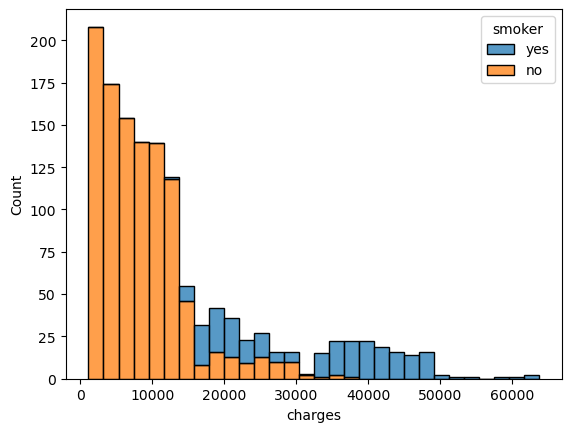

In [63]:
# 히스토그램 작성
sns.histplot(data=df_ins, hue='smoker', multiple="stack",
             x='charges')

<AxesSubplot:xlabel='region', ylabel='count'>

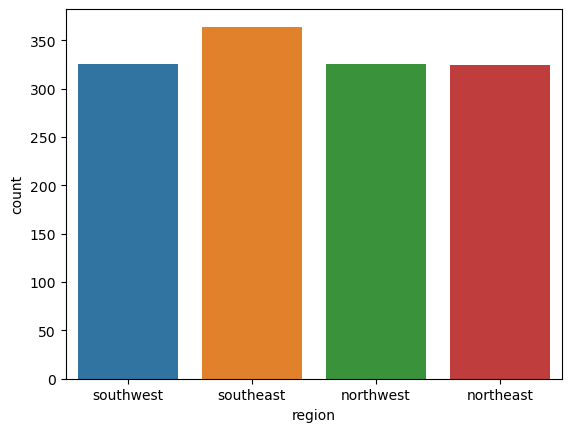

In [59]:
# 막대그래프 작성
sns.countplot(data=df_ins, 
              x='region')

smoker              no           yes
region                              
northeast  9165.531672  29673.536473
northwest  8556.463715  30192.003182
southwest  8019.284513  32269.063494
southeast  8032.216309  34844.996824


<AxesSubplot:xlabel='smoker', ylabel='region'>

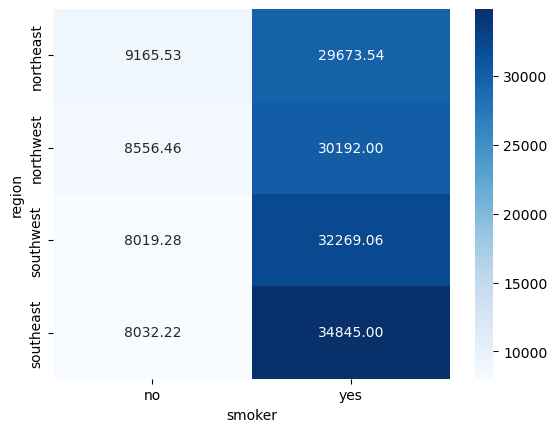

In [83]:
# 피벗 테이블을 열지도로 표현
print(pt1)
sns.heatmap(pt1, cmap='Blues', annot=True, fmt='.2f')

<br>

#### [실습] df_sp 활용

1. 'math score'의 히스토그램 생성
2. 'gender'별 학생 수를 계산 및 막대그래프 생성
3. 'race/ethnicity', 'parental level of education'별 'math score'의 평균 피벗테이블을 열지도로 표현

<AxesSubplot:xlabel='None-parental level of education', ylabel='race/ethnicity'>

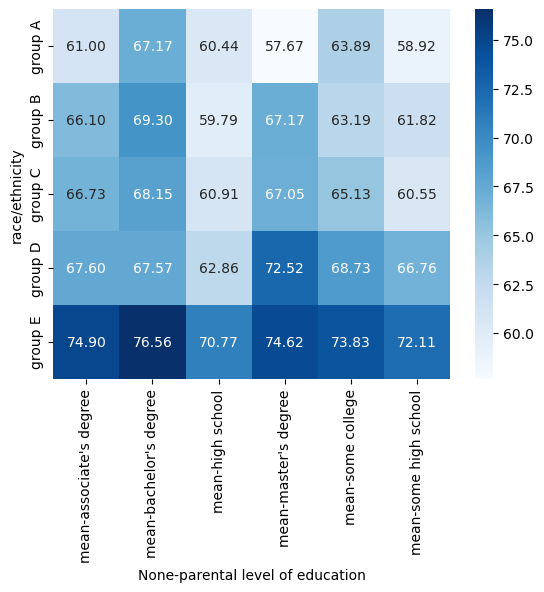

In [71]:
sns.histplot(data=df_sp, x='math score')
sns.countplot(data = df_sp, x = 'gender')
sns.heatmap(pt2, cmap='Blues', annot=True, fmt='.2f')

## 2. 데이터 집계와 데이터 처리 

데이터 집계를 통해 얻은 정보를 다양한 방법으로 데이터 처리에 활용할 수 있습니다.  
가장 대표적인 방법은 데이터 집계를 통해 관심 대상을 확인하고 선택하는 방법입니다.

In [92]:
# 집계값의 계산
agg2 = df_ins.groupby('region', as_index=False)['charges'].median()
agg2

,region,charges
0,northeast,10057.652025
1,northwest,8965.795750
2,southeast,9294.131950
3,southwest,8798.593000


In [93]:
# 상위 2개 지역 선택
target_region = agg2.nlargest(2, 'charges')['region']
target_region

0    northeast
2    southeast
Name: region, dtype: object

In [94]:
# 전체 관측치에서 .isin()을 활용하여 해당 지역 관측치만 선택
cond = df_ins['region'].isin(target_region)
cond

0       False
1        True
2        True
3       False
4       False
        ...  
1333    False
1334     True
1335     True
1336    False
1337    False
Name: region, Length: 1338, dtype: bool

In [95]:
df_ins[cond]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1327,51,male,30.030,1,no,southeast,9377.90470
1328,23,female,24.225,2,no,northeast,22395.74424
1330,57,female,25.740,2,no,southeast,12629.16560
1334,18,female,31.920,0,no,northeast,2205.98080


<br>

#### [실습] df_sp 활용

1. 'parental level of education'별 'reading score'의 평균을 계산
2. 1.의 결과에서 평균 점수 기준 상위 3개 부모교육수준 그룹을 *target*으로 저장하기
3. 'parental level of education'과 `.isin()`, 2.에서 저장한 *target*을 활용하여 전체 데이터에서 해당 그룹 관측치만 선택하고 **df_sub**로 저장
4. 3.의 부분 데이터 **df_sub**를 활용하여 'race/ethnicity'별 'writing score'의 평균 계산

In [124]:
agg3 = df_sp.groupby('parental level of education',as_index=False )['reading score'].mean()
tar_grp = agg3.nlargest(3,'reading score')['parental level of education']
tar_grp = list(tar_grp)


In [125]:
df_sub = df_sp[df_sp['parental level of education'].isin(tar_grp)]
df_sub.groupby('race/ethnicity', as_index=False)['writing score'].mean()

,race/ethnicity,writing score
0,group A,65.965517
1,group B,70.059701
2,group C,71.810219
3,group D,72.673267
4,group E,74.707692


<br>
<hr>
<br>

## 2. 반응형 그래프의 활용

**plotly**를 활용해서 반응형 그래프를 그려서 탐색적 데이터 분석 과정에서 유용하게 활용가능합니다.

* 참고: [Plotly](https://plotly.com/python/)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

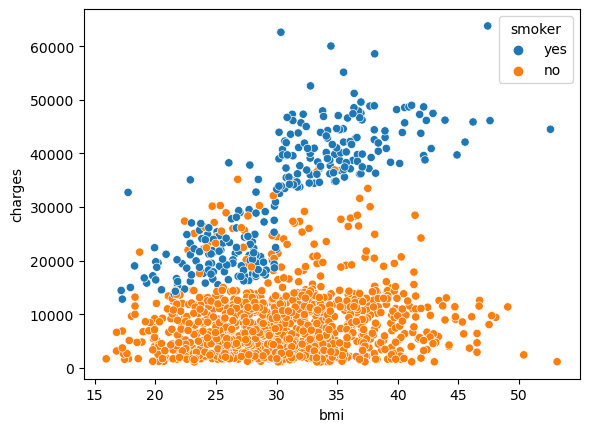

In [126]:
# seaborn을 활용한 산점도 
sns.scatterplot(data=df_ins, 
                x='bmi',
                y='charges', 
                hue='smoker')

In [128]:
import plotly.express as px
px.scatter(df_ins,
           x='bmi',
           y='charges', 
           color='smoker')

#### [실습]
1. df_sp에서 `parental level of education`별로 색을 다르게 한  `math score`와 `reading score`의 산점도 그리기 

In [130]:
px.scatter(df_sp,
           x='math score',
           y='reading score', 
           color='parental level of education')

#### End of script